<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_22_11_2021/notebooks/retail_GPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing GPy

In [1]:
!pip install --upgrade GPy

     |████████████████████████████████| 959 kB 5.5 MB/s 
     |████████████████████████████████| 71 kB 7.6 MB/s 
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565099 sha256=2399b31a4286a35509bc101964c1214250117d8f979702e9b5182c44507bddfa
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=cd31f27016db81d7d42243d27f006827ce369f014de5f977a1e0ab587795697a
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


# Importing libraries

In [2]:
%pylab inline
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import pylab as pb
from sklearn.model_selection import train_test_split


import GPy

Populating the interactive namespace from numpy and matplotlib


# Loading and encoding monthly data

In [3]:
data = {}
data['M1'] = pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/data_branch/data/M1_transform_hourly_arrivals_dataset.csv')
data['M2'] = pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/data_branch/data/M2_transform_hourly_arrivals_dataset.csv')
data['M3'] = pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/data_branch/data/M3_transform_hourly_arrivals_dataset.csv')

In [4]:
# Encoding h and Day column
days = {'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
for key in data.keys():
  data[key]['h']=[int(t.split(':')[0]) for t in data[key]['h']]
  data[key]['Day']=[days[d] for d in data[key]['Day']]

In [5]:
for i in range(1,4):
  data['M'+str(i)] = np.array(data['M'+str(i)])

In [6]:
data['M1'][:,:-1].shape

(311, 13)

In [7]:
X_M1,y_M1 = data['M1'][:,:-1] , np.array([[y] for y in data['M1'][:,-1]])

In [8]:
X_M1.shape , y_M1.shape

((311, 13), (311, 1))

# Modeling with GPy

- I have taken first 4/5 th data for training and rest for testing
- In the plots, there are red vertical lines. On the left of this line, it is for training data and on the right, it is for test data.

# Month 1

In [9]:
X_M1_train,y_M1_train = X_M1[:4*len(X_M1)//5],y_M1[:4*len(X_M1)//5]

In [10]:
kernel = GPy.kern.RBF(X_M1.shape[1], variance=1.0, lengthscale=1.0)

In [11]:
poisson_likelihood = GPy.likelihoods.Poisson()
laplace_inf = GPy.inference.latent_function_inference.Laplace()

In [12]:
m1 = GPy.core.GP(X=X_M1_train, Y=y_M1_train, likelihood=poisson_likelihood, inference_method=laplace_inf, kernel=kernel)
print (m1)
#Predictions of counts of buses, including noise arising from Poisson noise


Name : gp
Objective : 581.8835310936274
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |  value  |  constraints  |  priors
  rbf.variance     |    1.0  |      +ve      |        
  rbf.lengthscale  |    1.0  |      +ve      |        


In [13]:
#m1.randomize()
m1.optimize()
print (m1)


Name : gp
Objective : 422.232487608572
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |               value  |  constraints  |  priors
  rbf.variance     |  1.8592903185066105  |      +ve      |        
  rbf.lengthscale  |  10.824141588537934  |      +ve      |        


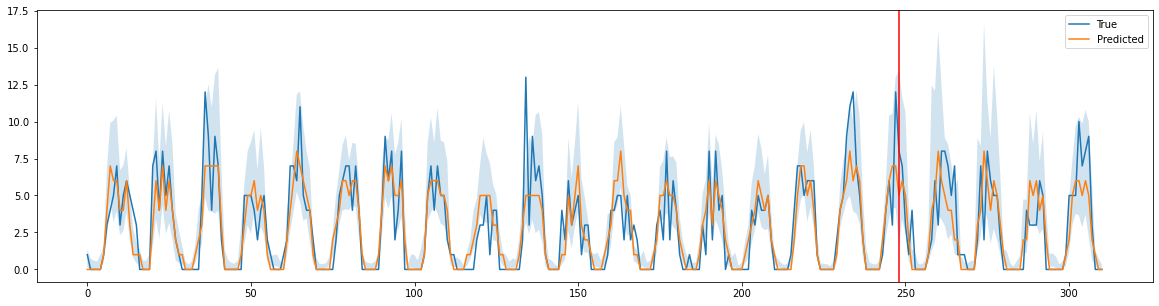

In [14]:
f_mean, f_var = m1._raw_predict(np.array(X_M1))
f_upper, f_lower = f_mean + 2*np.sqrt(f_var), f_mean - 2*np.sqrt(f_var)

# For test sets
plt.figure(figsize=(20,5))
plt.plot(pd.DataFrame(y_M1.reshape(-1)),label='True')
plt.plot(pd.DataFrame(np.rint(np.exp(f_mean.reshape(-1)))),label='Predicted')
plt.fill_between(np.arange(len(X_M1)), np.exp(f_lower.reshape(-1)),np.exp(f_upper.reshape(-1)),alpha=0.2)
plt.legend()
plt.axvline(4*len(X_M1)//5,color='r')

- On the left of the vertical red line, it is for training data and on the right, it is for test data.

# Month 2

In [15]:
X_M2,y_M2 = data['M2'][:,:-1] , np.array([[y] for y in data['M2'][:,-1]])
X_M2_train,y_M2_train = X_M2[:4*len(X_M2)//5],y_M2[:4*len(X_M2)//5]

In [16]:
kernel = GPy.kern.RBF(X_M2.shape[1], variance=1.0, lengthscale=1.0)
poisson_likelihood = GPy.likelihoods.Poisson()
laplace_inf = GPy.inference.latent_function_inference.Laplace()

In [17]:
m2 = GPy.core.GP(X=X_M2_train, Y=y_M2_train, likelihood=poisson_likelihood, inference_method=laplace_inf, kernel=kernel)
print (m2)
#Predictions of counts of buses, including noise arising from Poisson noise


Name : gp
Objective : 585.6006844569131
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |  value  |  constraints  |  priors
  rbf.variance     |    1.0  |      +ve      |        
  rbf.lengthscale  |    1.0  |      +ve      |        


In [18]:
#m2.randomize()
m2.optimize()
print (m2)


Name : gp
Objective : 434.25591973505215
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |               value  |  constraints  |  priors
  rbf.variance     |  1.3480149424109942  |      +ve      |        
  rbf.lengthscale  |    10.0636929641135  |      +ve      |        


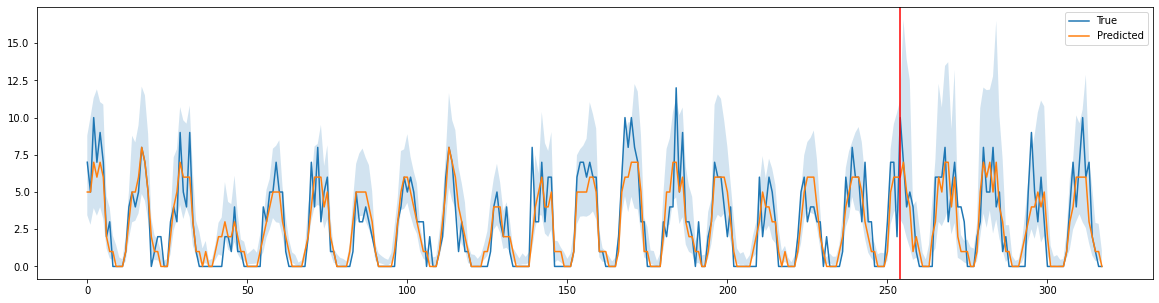

In [19]:
f_mean, f_var = m2._raw_predict(np.array(X_M2))
f_upper, f_lower = f_mean + 2*np.sqrt(f_var), f_mean - 2*np.sqrt(f_var)

plt.figure(figsize=(20,5))
plt.plot(pd.DataFrame(y_M2.reshape(-1)),label='True')
plt.plot(pd.DataFrame(np.rint(np.exp(f_mean.reshape(-1)))),label='Predicted')
plt.fill_between(np.arange(len(X_M2)), np.exp(f_lower.reshape(-1)),np.exp(f_upper.reshape(-1)),alpha=0.2)
plt.legend()
plt.axvline(4*len(X_M2)//5,color='r')

- On the left of the vertical red line, it is for training data and on the right, it is for test data.

# Month 3

In [20]:
X_M3,y_M3 = data['M3'][:,:-1] , np.array([[y] for y in data['M3'][:,-1]])
X_M3_train,y_M3_train = X_M3[:2*len(X_M3)//3],y_M3[:2*len(X_M3)//3]

In [21]:
kernel = GPy.kern.RBF(X_M3.shape[1], variance=1.0, lengthscale=1.0)

In [22]:
m3 = GPy.core.GP(X=X_M3_train, Y=y_M3_train, likelihood=poisson_likelihood, inference_method=laplace_inf, kernel=kernel)
print (m3)


Name : gp
Objective : 582.4099414255511
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |  value  |  constraints  |  priors
  rbf.variance     |    1.0  |      +ve      |        
  rbf.lengthscale  |    1.0  |      +ve      |        


In [23]:
#m3.randomize()
m3.optimize()
print (m3)


Name : gp
Objective : 429.81138311330994
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |               value  |  constraints  |  priors
  rbf.variance     |  2.4572858257816064  |      +ve      |        
  rbf.lengthscale  |   13.77522305898679  |      +ve      |        


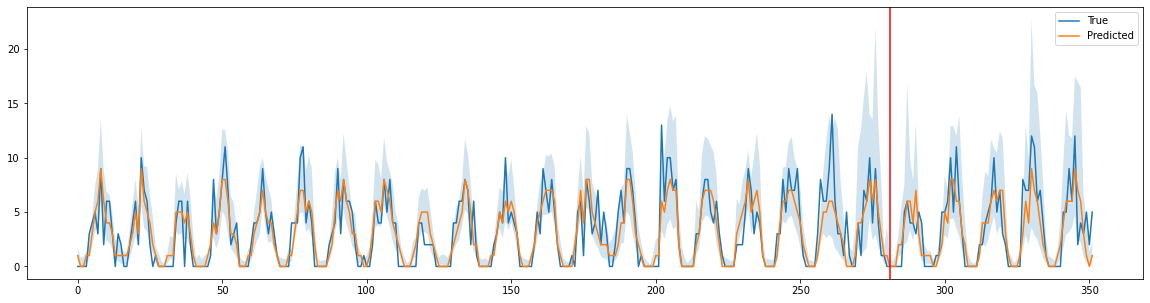

In [24]:
f_mean, f_var = m3._raw_predict(np.array(X_M3))
f_upper, f_lower = f_mean + 2*np.sqrt(f_var), f_mean - 2*np.sqrt(f_var)

plt.figure(figsize=(20,5))
plt.plot(pd.DataFrame(y_M3.reshape(-1)),label='True')
plt.plot(pd.DataFrame(np.rint(np.exp(f_mean.reshape(-1)))),label='Predicted')
plt.fill_between(np.arange(len(X_M3)), np.exp(f_lower.reshape(-1)),np.exp(f_upper.reshape(-1)),alpha=0.2)
plt.legend()
plt.axvline(4*len(X_M3)//5,color='r')

- On the left of the vertical red line, it is for training data and on the right, it is for test data.